In [2]:
library(ggplot2)
library(nlme)

source("helper.R")

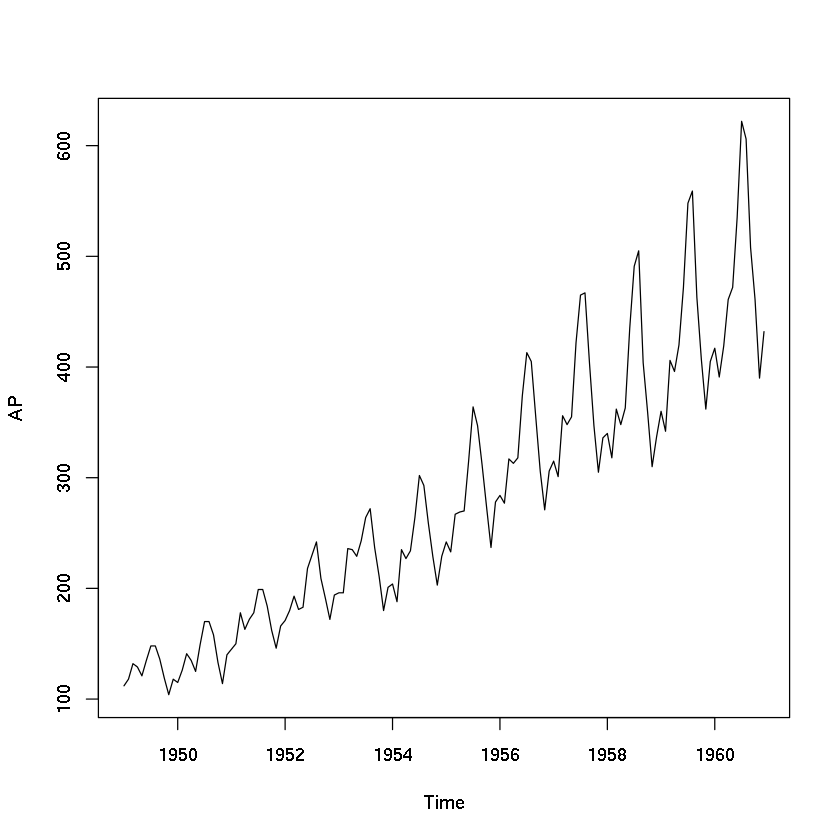

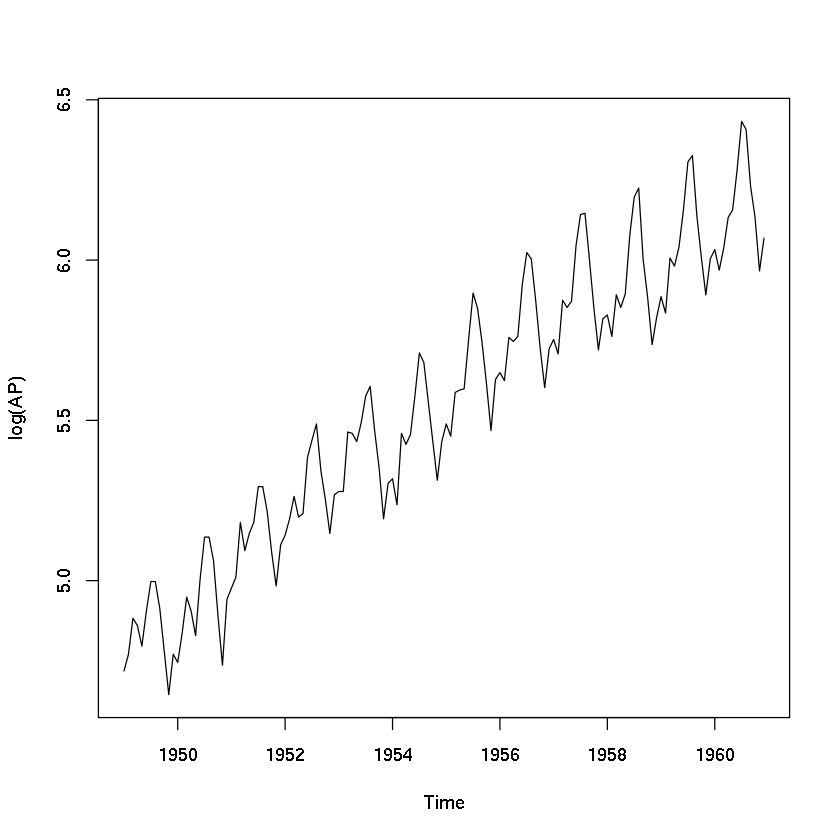

In [4]:
data(AirPassengers)
AP <- AirPassengers
plot(AP)
plot(log(AP))

In [5]:
SIN <- COS <- matrix(nrow = length(AP), ncol = 6)
for (i in 1:6) {
    COS[, i] <- cos(2 * pi * i * time(AP))
    SIN[, i] <- sin(2 * pi * i * time(AP))
}
TIME <- (time(AP) - mean(time(AP)))/sd(time(AP))
mean(time(AP))

AP.lm1 <- lm(log(AP) ~ TIME + I(TIME ^2) + I(TIME ^3) + I(TIME ^4) + COS[, 1] + SIN[, 1] +
                   COS[, 2] + SIN[, 2] + COS[, 3] + SIN[, 3] + COS[, 4] + SIN[, 4] +
                   COS[, 5] + SIN[, 5] + COS[, 6] + SIN[, 6])
summary(AP.lm1)
AIC(AP.lm1)

[1] 1954.958


Call:
lm(formula = log(AP) ~ TIME + I(TIME^2) + I(TIME^3) + I(TIME^4) + 
    COS[, 1] + SIN[, 1] + COS[, 2] + SIN[, 2] + COS[, 3] + SIN[, 
    3] + COS[, 4] + SIN[, 4] + COS[, 5] + SIN[, 5] + COS[, 6] + 
    SIN[, 6])

Residuals:
      Min        1Q    Median        3Q       Max 
-0.132003 -0.036965  0.003728  0.028642  0.104841 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.588e+00  7.503e-03 744.685  < 2e-16 ***
TIME         4.269e-01  1.007e-02  42.382  < 2e-16 ***
I(TIME^2)   -6.570e-02  1.578e-02  -4.162 5.77e-05 ***
I(TIME^3)   -3.900e-03  5.190e-03  -0.751 0.453746    
I(TIME^4)    1.110e-02  5.927e-03   1.873 0.063429 .  
COS[, 1]    -1.476e-01  5.664e-03 -26.055  < 2e-16 ***
SIN[, 1]     2.773e-02  5.696e-03   4.868 3.28e-06 ***
COS[, 2]     5.662e-02  5.660e-03  10.004  < 2e-16 ***
SIN[, 2]     5.890e-02  5.666e-03  10.395  < 2e-16 ***
COS[, 3]    -8.831e-03  5.660e-03  -1.560 0.121216    
SIN[, 3]    -2.742e-02  5.661e-03  -4.844 3.64e

[1] -447.9475

In [7]:
# optimized

AP.lm3 <- step(AP.lm1, trace = 0)
summary(AP.lm3)
AIC(AP.lm3)


Call:
lm(formula = log(AP) ~ TIME + I(TIME^2) + I(TIME^4) + COS[, 1] + 
    SIN[, 1] + COS[, 2] + SIN[, 2] + COS[, 3] + SIN[, 3] + COS[, 
    4] + SIN[, 4] + SIN[, 5])

Residuals:
      Min        1Q    Median        3Q       Max 
-0.136151 -0.038787  0.005341  0.029232  0.104919 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.587706   0.007451 749.965  < 2e-16 ***
TIME         0.419967   0.004000 105.001  < 2e-16 ***
I(TIME^2)   -0.065623   0.015667  -4.188 5.12e-05 ***
I(TIME^4)    0.011063   0.005881   1.881 0.062186 .  
COS[, 1]    -0.147488   0.005622 -26.236  < 2e-16 ***
SIN[, 1]     0.028154   0.005630   5.001 1.80e-06 ***
COS[, 2]     0.056731   0.005619  10.096  < 2e-16 ***
SIN[, 2]     0.059095   0.005621  10.513  < 2e-16 ***
COS[, 3]    -0.008732   0.005619  -1.554 0.122617    
SIN[, 3]    -0.027293   0.005619  -4.857 3.34e-06 ***
COS[, 4]     0.011105   0.005619   1.976 0.050219 .  
SIN[, 4]    -0.031986   0.005619  -5.693 7.82e-08 ***


[1] -453.4617

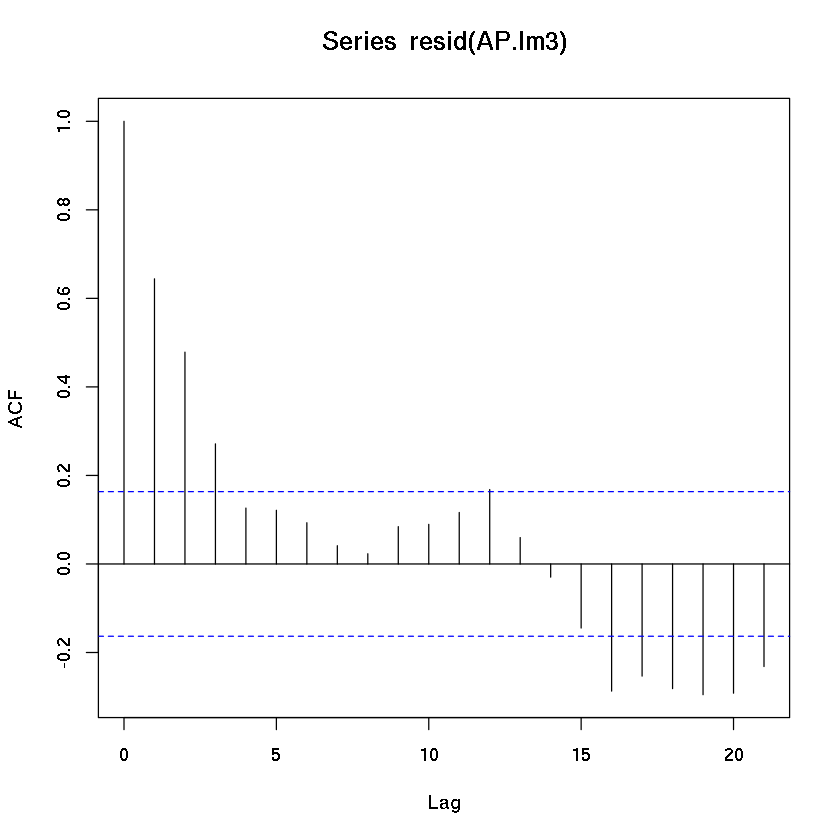

In [8]:
acf(resid(AP.lm3))

In [11]:
AP.gls <- gls(log(AP) ~ TIME + I(TIME ^2) + COS[, 1] + SIN[, 1] +
                      COS[, 2] + SIN[, 2] + COS[, 3] + SIN[, 3] + COS[, 4] + SIN[, 4] +
                      SIN[, 5],
                  correlation = corAR1(0.6))
summary(AP.gls)
AIC(AP.gls)

Generalized least squares fit by REML
  Model: log(AP) ~ TIME + I(TIME^2) + COS[, 1] + SIN[, 1] + COS[, 2] +      SIN[, 2] + COS[, 3] + SIN[, 3] + COS[, 4] + SIN[, 4] + SIN[,      5] 
  Data: NULL 
        AIC       BIC   logLik
  -425.2056 -384.8464 226.6028

Correlation Structure: AR(1)
 Formula: ~1 
 Parameter estimate(s):
      Phi 
0.6865262 

Coefficients:
                Value   Std.Error  t-value p-value
(Intercept)  5.578405 0.014252362 391.4021  0.0000
TIME         0.417954 0.009284479  45.0164  0.0000
I(TIME^2)   -0.035981 0.010115294  -3.5571  0.0005
COS[, 1]    -0.147192 0.008005183 -18.3871  0.0000
SIN[, 1]     0.026813 0.008095273   3.3122  0.0012
COS[, 2]     0.056480 0.004832268  11.6881  0.0000
SIN[, 2]     0.058301 0.004851412  12.0172  0.0000
COS[, 3]    -0.009108 0.003539176  -2.5736  0.0112
SIN[, 3]    -0.027778 0.003539171  -7.8486  0.0000
COS[, 4]     0.010684 0.002927910   3.6491  0.0004
SIN[, 4]    -0.032271 0.002918780 -11.0565  0.0000
SIN[, 5]    -0.021397 0

[1] -425.2056

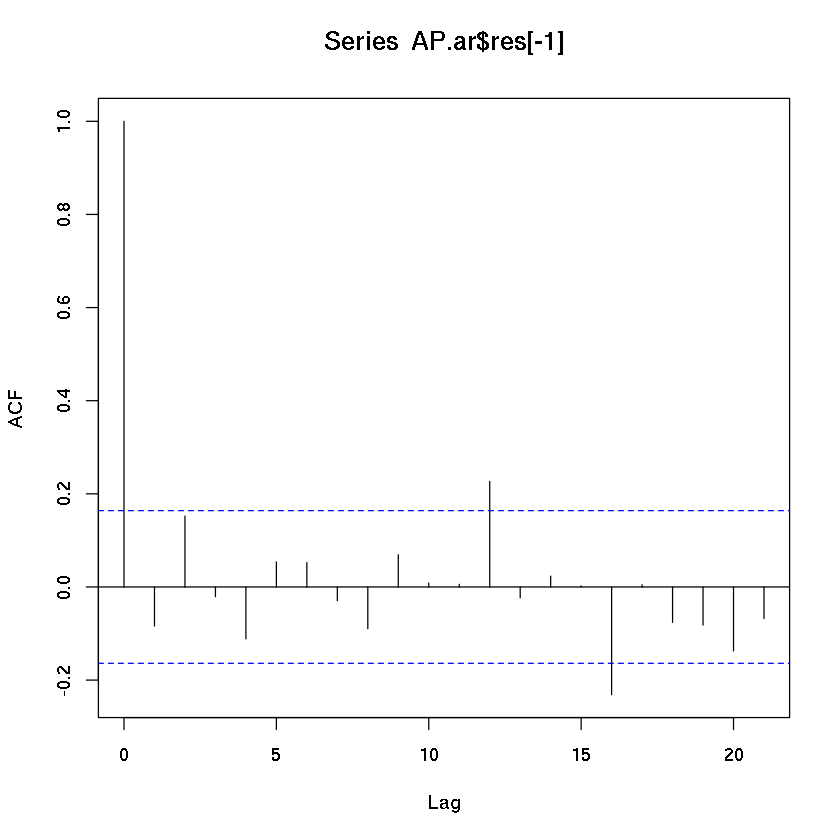

In [12]:
AP.ar <- ar(resid(AP.lm3), order = 1, method = "mle")
acf(AP.ar$res[-1])

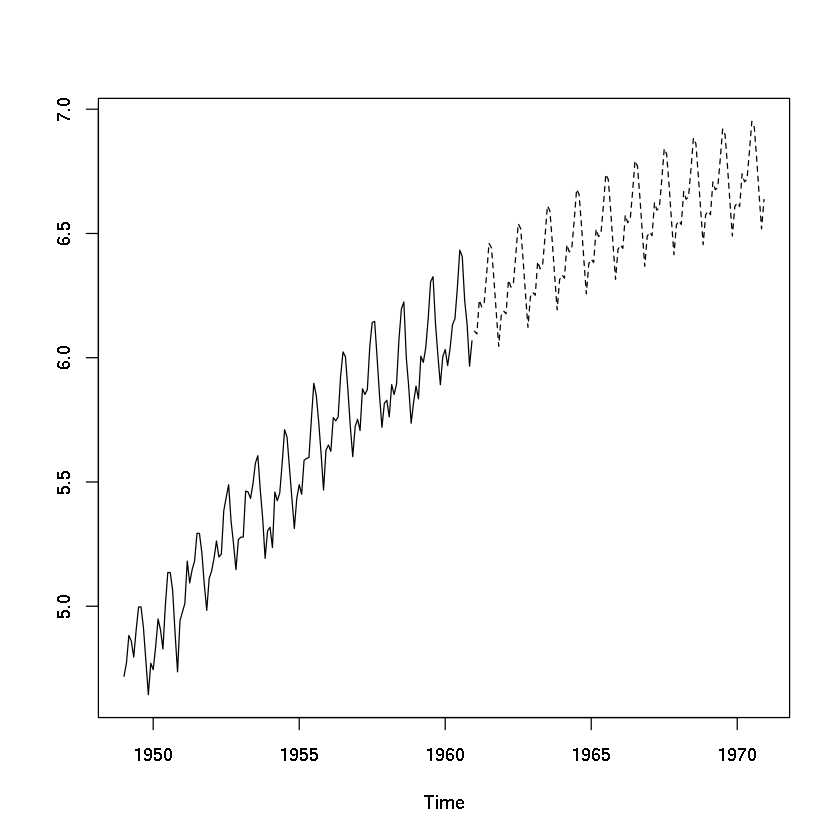

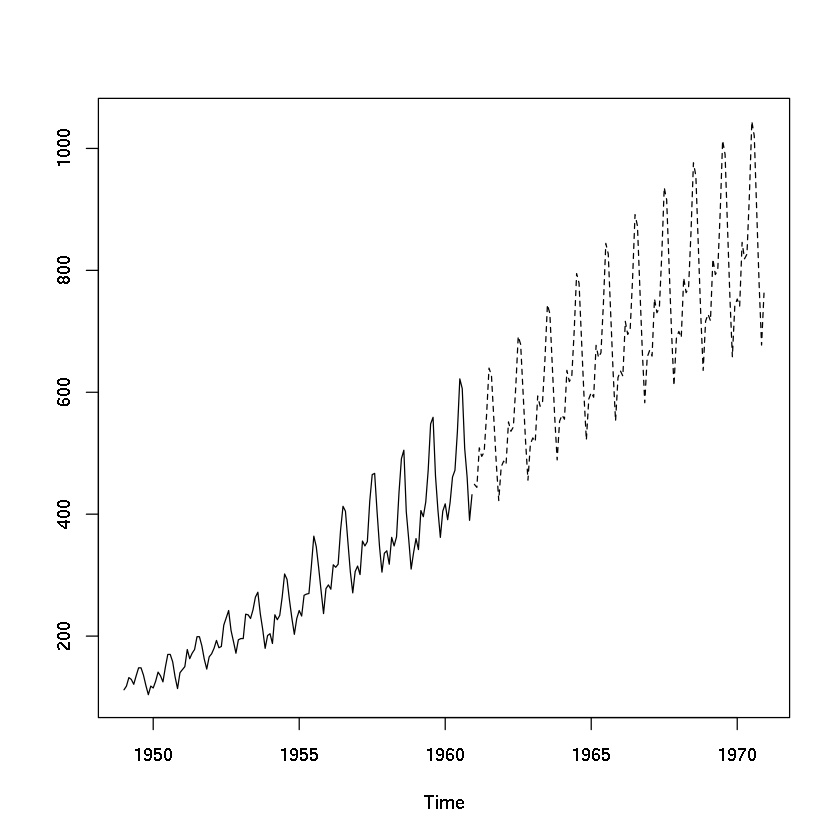

In [14]:
# predicting

new.t <- time(ts(start = 1961, end = c(1970, 12), fr = 12))
TIME <- (new.t - mean(time(AP)))/sd(time(AP))

SIN <- COS <- matrix(nrow = length(new.t), ncol = 6)
for (i in 1:6) {
    COS[, i] <- cos(2 * pi * i * new.t)
    SIN[, i] <- sin(2 * pi * i * new.t)
}
SIN <- SIN[, -6]
new.dat <- data.frame(TIME = as.vector(TIME),
                      SIN  = SIN,
                      COS  = COS)
AP.pred.ts <- exp(ts(predict(AP.gls, new.dat), st = 1961, fr = 12))
ts.plot(log(AP), log(AP.pred.ts), lty = 1:2)
ts.plot(AP, AP.pred.ts, lty = 1:2)

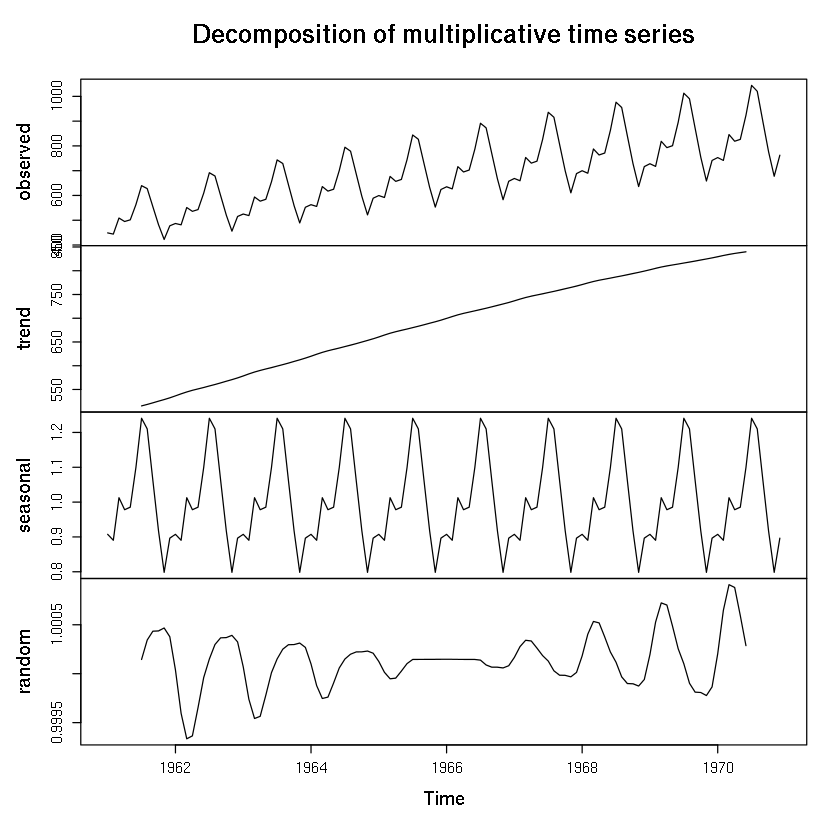

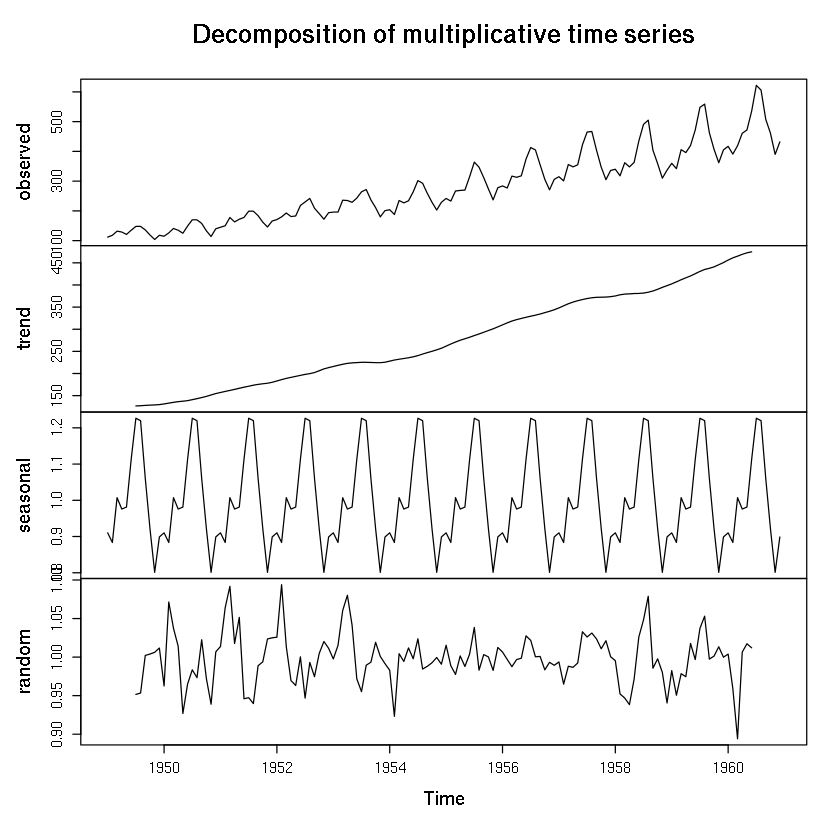

In [17]:
plot(decompose(AP.pred.ts, type = "multiplicative"))
plot(decompose(AP, type = "multiplicative"))